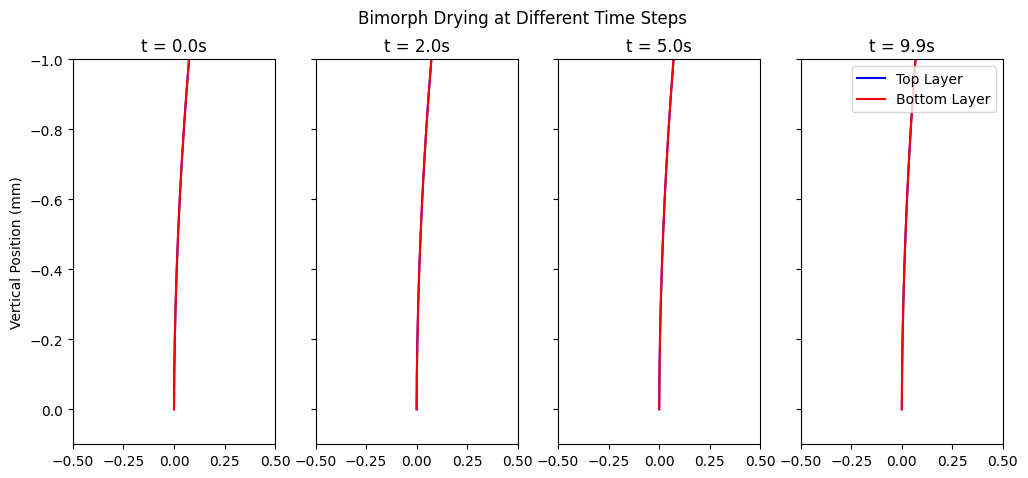

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k_evap = 0.01  # Evaporation rate constant
C_env = 0.1    # Equilibrium water content
h_top = 0.5    # Initial water content in top layer
h_bottom = 0.8 # Initial water content in bottom layer
thickness_top = 0.1  
thickness_bottom = 0.1 
swelling_coefficient = 0.3  
time_steps = 100  
dt = 0.1  
n_segments = 20  # Number of segments in the bimorph
frame_times = [0, 20, 50, 99]  # Time points to visualize

# Storage arrays
curvature = np.zeros(time_steps)

# Simulation loop
for t in range(time_steps):
    # Compute evaporation-induced water loss
    dh_top = -k_evap * (h_top - C_env) * dt
    dh_bottom = -k_evap * (h_bottom - C_env) * dt
    
    # Update water contents
    h_top += dh_top
    h_bottom += dh_bottom
    
    # Compute differential shrinkage
    strain_top = swelling_coefficient * dh_top
    strain_bottom = swelling_coefficient * dh_bottom
    d_strain = strain_top - strain_bottom
    
    # Compute curvature
    curvature[t] = (6 * d_strain) / (thickness_top + thickness_bottom)**2

# Plot multiple time frames
fig, axes = plt.subplots(1, len(frame_times), figsize=(12, 5), sharey=True)

for idx, t in enumerate(frame_times):
    ax = axes[idx]
    angle_accum = 0  # Reset angle accumulation
    x_top, y_top = [0], [0]  # Top layer (starts at origin)
    x_bottom, y_bottom = [0], [0]  # Bottom layer (starts at origin)

    for i in range(n_segments):
        angle_accum += curvature[t]  # Incremental bending
        
        # Calculate new segment points
        x_new_top = x_top[-1] + np.sin(angle_accum) * thickness_top
        y_new_top = y_top[-1] - np.cos(angle_accum) * thickness_top
        x_top.append(x_new_top)
        y_top.append(y_new_top)

        x_new_bottom = x_bottom[-1] + np.sin(angle_accum) * thickness_bottom
        y_new_bottom = y_bottom[-1] - np.cos(angle_accum) * thickness_bottom
        x_bottom.append(x_new_bottom)
        y_bottom.append(y_new_bottom)

    # Plot the two layers of the bimorph
    ax.plot(x_top, y_top, color="blue", label="Top Layer")
    ax.plot(x_bottom, y_bottom, color="red", label="Bottom Layer")
    ax.set_title(f"t = {t * dt:.1f}s")
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(-1, 0.1)
    ax.invert_yaxis()  # Ensures the top is stationary

axes[0].set_ylabel("Vertical Position (mm)")
axes[-1].legend()
plt.suptitle("Bimorph Drying at Different Time Steps")
plt.show()
